<a href="https://colab.research.google.com/github/aana0308/ML-Project-Template/blob/main/notebooks/Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning#

Importing the required Python libraries

In [31]:
# load libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mount drive and load the CalCOFI dataset

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#load and display cast.csv
d1 = pd.read_csv('/content/drive/MyDrive/Data Analytics Club/CALCOFI regression analysis/cast.csv')
d1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,Year,Month,Julian_Date,Julian_Day,Time,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Name,Ship_Code,Data_Type,Order_Occ,Event_Num,Cruz_Leg,Orig_Sta_ID,Data_Or,Cruz_Num,IntChl,IntC14,Inc_Str,Inc_End,PST_LAN,Civil_T,TimeZone,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,1949,3,17958,60,09:30:00,38.833333,38,50.000,N,-124.083333,-124,5.000,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,NaN,NaN,CREST,31CR,HY,NaN,1.0,NaN,054 56,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,1949,3,17958,60,21:12:00,38.583333,38,35.000,N,-125.800000,-125,48.000,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,NaN,NaN,CREST,31CR,HY,NaN,2.0,NaN,052 75,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,1949,3,17959,61,03:54:00,38.475000,38,28.500,N,-126.666666,-126,40.000,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,3.0,NaN,051 85,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,1949,3,17959,61,10:42:00,38.333333,38,20.000,N,-127.516666,-127,31.000,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,NaN,NaN,CREST,31CR,HY,NaN,4.0,NaN,050 95,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,1949,3,17959,61,17:06:00,38.233333,38,14.000,N,-128.366666,-128,22.000,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,5.0,NaN,050 104,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,11/09/2016,2016,11,37569,313,03:14:49,30.845780,30,50.747,N,-121.587870,-121,35.272,W,93.3,93.3,93.3,90.0,90.0,90.0,4125.0,NaN,NaN,RV SALLY RIDE,33SR,MX,14.0,168.0,1.0,93.3 90.0,3101,1611,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,11/09/2016,2016,11,37569,313,08:51:14,30.512570,30,30.754,N,-122.258020,-122,15.481,W,93.3,93.3,93.3,100.0,100.0,100.0,4192.0,NaN,NaN,RV SALLY RIDE,33SR,MX,15.0,177.0,1.0,93.3 100.0,3101,1611,28.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,11/09/2016,2016,11,37569,313,14:48:56,30.173780,30,10.427,N,-122.919720,-122,55.183,W,93.3,93.3,93.3,110.0,110.0,110.0,3731.0,NaN,NaN,RV SALLY RIDE,33SR,MX,16.0,186.0,1.0,93.3 110.0,3101,1611,26.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,11/09/2016,2016,11,37569,313,20:53:27,29.846780,29,50.807,N,-123.586670,-123,35.200,W,93.3,93.3,93.3,120.0,120.0,120.0,4149.0,25.0,NaN,RV SALLY RIDE,33SR,MX,17.0,212.0,1.0,93.3 120.0,3101

In [34]:
#load and display bottle.csv
d2 = pd.read_csv('/content/drive/MyDrive/Data Analytics Club/CALCOFI regression analysis/bottle.csv')
d2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,7,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.905,NaN,0.176,NaN,0.22,NaN,1.77,NaN,0.029,NaN,0.10,NaN,0.02,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0.02,0.91,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.905,NaN,0.176,NaN,0.22,NaN,1.77,NaN,0.029,NaN,0.10,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,0.00,0.91,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.915,NaN,0.182,NaN,0.20,NaN,1.75,NaN,0.027,NaN,0.09,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,0.00,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.078,NaN,0.313,NaN,0.25,NaN,1.99,NaN,0.030

Get information on the data available in both datasets provided

In [35]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [36]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [37]:
d1.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,Lat_Dec,Lat_Deg,Lat_Min,Lon_Dec,Lon_Deg,Lon_Min,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Order_Occ,Event_Num,Cruz_Leg,IntChl,IntC14,TimeZone,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,34404.000000,32123.000000,5263.000000,2077.000000,9954.000000,34401.000000,1464.000000,12203.000000,2129.000000,4782.0,12558.000000,12098.000000,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,31.791633,31.295489,29.768673,-119.756973,-119.249012,30.477716,93.298619,93.518669,93.308476,62.092437,62.091998,61.654296,2249.632693,19.869466,3.035147,51.309624,1538.788146,1.013661,50.146939,395.910005,8.0,29.575251,4.338982,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,3.655921,3.664473,17.240289,3.991786,4.006454,17.307530,22.180347,28.731293,22.229601,33.045414,33.043295,33.384777,1608.214388,8.776300,1.810699,74.157735,1220.867472,0.517451,60.754351,422.409165,0.0,8.201669,2.796105,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,18.416666,18.000000,0.000000,-164.083333,-164.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.500000,-30.600000,7.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.400000,29.500000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,29.750000,29.000000,14.770750,-122.058333,-122.000000,16.000000,81.000000,81.000000,80.800000,40.000000,40.000000,40.000000,657.000000,13.000000,2.000000,19.000000,552.000000,1.000000,25.300000,158.000000,8.0,28.000000,2.000000,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,32.405000,32.000000,29.100000,-119.616666,-119.000000,30.300000,90.000000,90.000000,90.000000,55.000000,55.000000,55.100000,2103.000000,19.000000,3.000000,40.000000,1225.000000,1.000000,32.800000,254.800000,8.0,31.000000,4.000000,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,33.823333,33.000000,45.000000,-117.450000,-117.000000,46.000000,106.700000,106.700000,106.600000,80.000000,80.000000,79.800000,3840.000000,26.000000,4.000000,60.000000,2330.000000,1.000000,48.200000,467.900000,8.0,33.000000,6.000000,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,47.916666,47.000000,59.900000,-105.966666,-105.000000,59.936000,176.700000,1734.000000,176.500000,531.100000,531.000000,531.100000,8230.000000,58.000000,21.000000,3003.000000,30022.000000,3.000000,1043.200000,5946.400000,8.0,49.000000,40.000000,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.0

In [38]:
d2.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

Since the problem statement is about the relation between temperature of the water and its salinity, we will make a separate dataset including only those 2 columns for convenience

In [39]:
dataset = d2[['T_degC','Salnty']]
dataset

,T_degC,Salnty
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


Rename the columns appropriately

In [40]:
dataset.columns = ['Temperature', 'Salinity']

Check how many NULL values are there in dataset

In [41]:
dataset.isnull().sum()

Temperature    10963
Salinity       47354
dtype: int64

Drop NaN or missing input values

In [45]:
final_data = dataset.dropna()
final_data.isnull().sum()

Temperature    0
Salinity       0
dtype: int64

Information about finally acquired dataset

In [46]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Temperature  814247 non-null  float64
 1   Salinity     814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


In [47]:
final_data.describe()

,Temperature,Salinity
count,814247.000000,814247.000000
mean,10.860287,33.841337
std,4.224930,0.461636
min,1.440000,28.431000
25%,7.750000,33.489000
50%,10.110000,33.866000
75%,13.930000,34.197000
max,31.140000,37.034000


Check correlation between variables

In [50]:
final_data.corr()

,Temperature,Salinity
Temperature,1.000000,-0.505266
Salinity,-0.505266,1.000000


Save final_data dataframe as csv file

In [53]:
final_data.to_csv('/content/drive/MyDrive/Data Analytics Club/CALCOFI regression analysis/final_dataset.csv')

#Data visualisation#

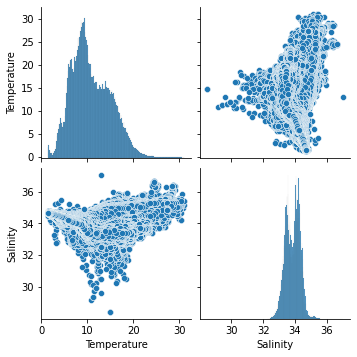

In [51]:
sns.pairplot(data = final_data)